![Unidata organization logo](https://github.com/Unidata/metpy-ams-2023/raw/main/logos/unidata_logo_horizontal.png)

# Upper Air Observations

> In this lesson, we will demonstrate how to use tools in MetPy and Siphon to easily access upper air observations and plot these data on a map or as a profile on a Skew-T.

*MetPy for your Data: Analyzing Meteorological Observations in Python*  
*2023 AMS Annual Meeting*

## Table of Contents
* <a href="#download">1: Access upper air data from the Iowa Environmental Mesonet Archive</a>
* <a href="#plot">2: Visualize the data</a>
* <a href="#download_profile">3: Download a profile of upper air data from the University of Wyoming Archive</a>
* <a href="#mixingratio">4: Ploting with Skew-T Diagrams</a>

## Access upper air data from the Iowa Environmental Mesonet Archive

In [1]:
from datetime import datetime
from siphon.simplewebservice.iastate import IAStateUpperAir

orig_data = IAStateUpperAir.request_all_data(datetime(1993, 3, 13, 12), pressure=500)

In [2]:
orig_data

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind
0,500.0,5291.0,-32.9,-45.7,321.0,48.0,1M1,1993-03-13 12:00:00,30.207379,-37.303006
1,500.0,5120.0,-44.1,-52.1,320.0,50.0,CWPL,1993-03-13 12:00:00,32.139380,-38.302222
2,500.0,5400.0,-24.9,-26.6,260.0,107.0,CWQI,1993-03-13 12:00:00,105.374430,18.580355
3,500.0,5460.0,-29.7,-31.4,320.0,39.0,CWSE,1993-03-13 12:00:00,25.068717,-29.875733
4,500.0,4970.0,-45.1,-54.1,255.0,38.0,CYAH,1993-03-13 12:00:00,36.705181,9.835124
...,...,...,...,...,...,...,...,...,...,...
114,500.0,5195.0,-39.7,-53.1,259.0,21.0,KY62,1993-03-13 12:00:00,20.614171,4.006989
115,500.0,5372.0,-32.7,-39.5,122.0,31.0,KYAK,1993-03-13 12:00:00,-26.289491,16.427497
116,500.0,5229.0,-33.1,-41.1,255.0,81.0,KYMW,1993-03-13 12:00:00,78.239992,20.964343
117,500.0,5764.0,-9.3,-10.9,NaN,NaN,KYNN,1993-03-13 12:00:00,NaN,NaN


Now that we have the data downloaded, we need to massage it a bit so we can work with it. Notice anything missing?

In [3]:
from metpy.io import add_station_lat_lon

upper_air_df = add_station_lat_lon(orig_data)

In [4]:
upper_air_df

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude
0,500.0,5291.0,-32.9,-45.7,321.0,48.0,1M1,1993-03-13 12:00:00,30.207379,-37.303006,NaN,NaN
1,500.0,5120.0,-44.1,-52.1,320.0,50.0,CWPL,1993-03-13 12:00:00,32.139380,-38.302222,51.47,-90.2
2,500.0,5400.0,-24.9,-26.6,260.0,107.0,CWQI,1993-03-13 12:00:00,105.374430,18.580355,NaN,NaN
3,500.0,5460.0,-29.7,-31.4,320.0,39.0,CWSE,1993-03-13 12:00:00,25.068717,-29.875733,53.53,-114.08
4,500.0,4970.0,-45.1,-54.1,255.0,38.0,CYAH,1993-03-13 12:00:00,36.705181,9.835124,53.75,-73.67
...,...,...,...,...,...,...,...,...,...,...,...,...
114,500.0,5195.0,-39.7,-53.1,259.0,21.0,KY62,1993-03-13 12:00:00,20.614171,4.006989,46.47,-84.37
115,500.0,5372.0,-32.7,-39.5,122.0,31.0,KYAK,1993-03-13 12:00:00,-26.289491,16.427497,NaN,NaN
116,500.0,5229.0,-33.1,-41.1,255.0,81.0,KYMW,1993-03-13 12:00:00,78.239992,20.964343,NaN,NaN
117,500.0,5764.0,-9.3,-10.9,NaN,NaN,KYNN,1993-03-13 12:00:00,NaN,NaN,NaN,NaN


So we now have added latitude/longitude information using MetPy's station tables. But we have two other problems. One is the stations for which our latitude and longitude information is missing. The other relates to the actual data type of the latitude and longitude.

In [5]:
upper_air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pressure     119 non-null    float64       
 1   height       119 non-null    float64       
 2   temperature  118 non-null    float64       
 3   dewpoint     116 non-null    float64       
 4   direction    110 non-null    float64       
 5   speed        110 non-null    float64       
 6   station      119 non-null    object        
 7   time         119 non-null    datetime64[ns]
 8   u_wind       110 non-null    float64       
 9   v_wind       110 non-null    float64       
 10  latitude     91 non-null     object        
 11  longitude    91 non-null     object        
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 11.3+ KB


So to address this, we can use some Pandas tools:

In [6]:
upper_air_df = upper_air_df.astype({'latitude': float, 'longitude': float})
upper_air_df = upper_air_df.dropna(subset=['latitude', 'longitude'])

For many use cases, this is enough massaging data. If we want to make use of the unit information, we can also use a tool from Metpy `pandas_dataframe_to_unit_arrays`, which takes unit information and converts the Pandas columns into MetPy's prototypical `pint.Quantity` (numpy arrays with unit information) that works with all of MetPy's calculations.

In [7]:
from metpy.units import pandas_dataframe_to_unit_arrays

upper_air_data = pandas_dataframe_to_unit_arrays(upper_air_df, orig_data.units)

In [8]:
upper_air_data

{'pressure': array([500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500., 500., 500., 500., 500., 500., 500., 500., 500.,
        500., 500., 500.]) <Unit('hectopascal')>,
 'height': array([5120., 5460., 4970., 5020., 4876., 4879., 5370., 5200., 4860.,
        5079., 5050., 4889., 5220., 4889., 5389., 5310., 4850., 4910.,
        5370., 5500., 5450., 5079., 5010., 4900., 5560., 5129., 5632.,
        5378., 5406., 5554., 5360., 5336., 5313., 5604., 5705., 5350.,
        5245., 5482., 5493., 5317., 5643., 5326., 54

## Activity: Visualize the data

<div class="admonition alert alert-warning">

<p class="admonition-title" style="font-weight:bold">Activity: Visualize your data</p>

Now that we have the data, we can plot it just like we have other data sets today:    
    
* Set up a Cartopy-based map plot

* Add contours of the height using the `tricontour` plotting function (looks just like `contour` but can work with irregularly-spaced 2D data)
    
* Using what was done with the surface data, add some station plots of the data including:
    - Station ID
    - Height
    - Temperature
    - Dewpoint
    - Wind barbs

* Bonus: Add red contours of temperature as well

</div>

/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/matplotlib/tri/triangulation.py:175: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)
/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


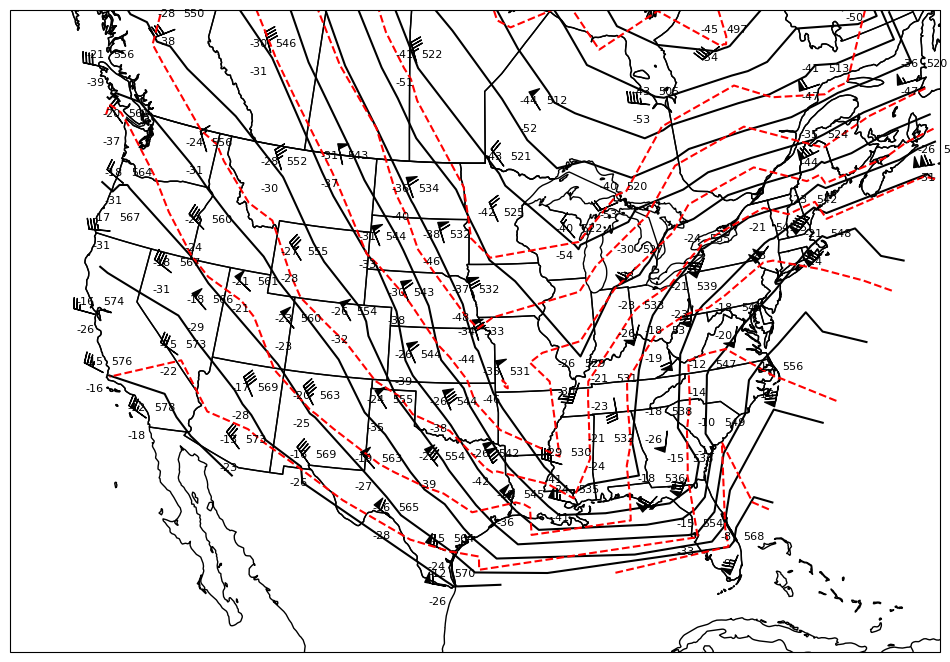

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.plots import StationPlot


# YOUR CODE BEGINS HERE

# Create a figure and axes
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection=ccrs.LambertConformal())

# Create a Station Plots
sp = StationPlot(ax, upper_air_data['longitude'], upper_air_data['latitude'],
                 fontsize=8, spacing=10, transform=ccrs.PlateCarree())
sp.plot_parameter('NE', upper_air_data['height'] / 10)
sp.plot_parameter('NW', upper_air_data['temperature'])
sp.plot_parameter('SW', upper_air_data['dewpoint'])
sp.plot_barb(upper_air_data['u_wind'], upper_air_data['v_wind'])


# Plot contours of height (and temperature)
ax.tricontour(upper_air_data['longitude'], upper_air_data['latitude'], upper_air_data['height'],
              levels=range(0, 10000, 60), colors='black',
              transform=ccrs.PlateCarree())
ax.tricontour(upper_air_data['longitude'], upper_air_data['latitude'], upper_air_data['temperature'],
              levels=range(-100, 0, 5), colors='red',
              transform=ccrs.PlateCarree())

# Add some maps
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_extent((-122, -70, 20, 55))

## Download a profile of upper air data from the University of Wyoming Archive

As an additional source for data, Siphon also has a class that simplifies access to the University of Wyoming's archive of upper air data. This uses an almost identical interface as the one used above.

In [10]:
from siphon.simplewebservice.wyoming import WyomingUpperAir

df = WyomingUpperAir.request_data(datetime(2013, 5, 21, 0), 'DNR')

# Convert to arrays with units attached
sounding_data = pandas_dataframe_to_unit_arrays(df)

In [11]:
sounding_data

{'pressure': array([835. , 821. , 815. , 813.5, 797. , 784.1, 755.5, 727.9, 700. ,
        680. , 657. , 649.7, 622. , 601.1, 564. , 555.6, 521. , 509. ,
        502. , 500. , 483. , 472.9, 470. , 452. , 432. , 417.5, 400.3,
        400. , 387. , 383.6, 351.7, 338. , 322. , 307.9, 300. , 293. ,
        280.8, 268. , 250. , 247. , 243.9, 242. , 235. , 232.8, 222.1,
        222. , 216. , 212.1, 212. , 200. , 180. , 176.5, 168.6, 163. ,
        156. , 153.8, 150. , 146.8, 146. , 140.1, 137. , 133.7, 124. ,
        121.5, 112. , 107. , 103. , 100. ,  81.7,  74.7,  74.2,  71.1,
         70. ,  67.7,  64.4,  64. ,  61.3,  59.8,  58.4,  55.5,  51.8,
         50.4,  50. ,  46.5,  45.7,  43.5,  43.4,  39.5,  36.6,  35.9,
         32.5,  31.1,  30. ,  28.6,  28.3,  27. ,  24.6,  23.9,  23.4,
         22.3,  21.3,  20.2,  20. ,  18.5,  17.7,  16.3,  16.1,  14.7,
         13.4,  13.4,  11.7,  11.5]) <Unit('hectopascal')>,
 'height': array([ 1611,  1753,  1814,  1829,  2000,  2134,  2438,  2743,  3

## Plotting with Skew-T Diagrams
In meteorology, in addition to the 2D planar map plots, we often analyze upper air data by looking at vertical profiles, plotted on a Skew-T logP diagram. MetPy features tools to help generate these plots in Python.

From here, we can quickly generate a skew-T plot using MetPy's `SkewT` class:

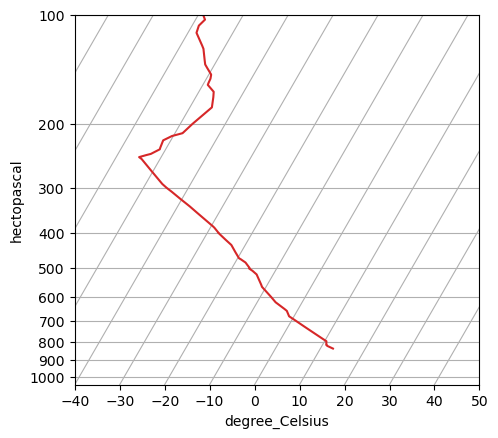

In [12]:
from metpy.plots import SkewT

skew = SkewT()
skew.plot(sounding_data['pressure'], sounding_data['temperature'], 'tab:red')

`SkewT` also features tools to add some common plot features, like dry adiabats or wind barbs:

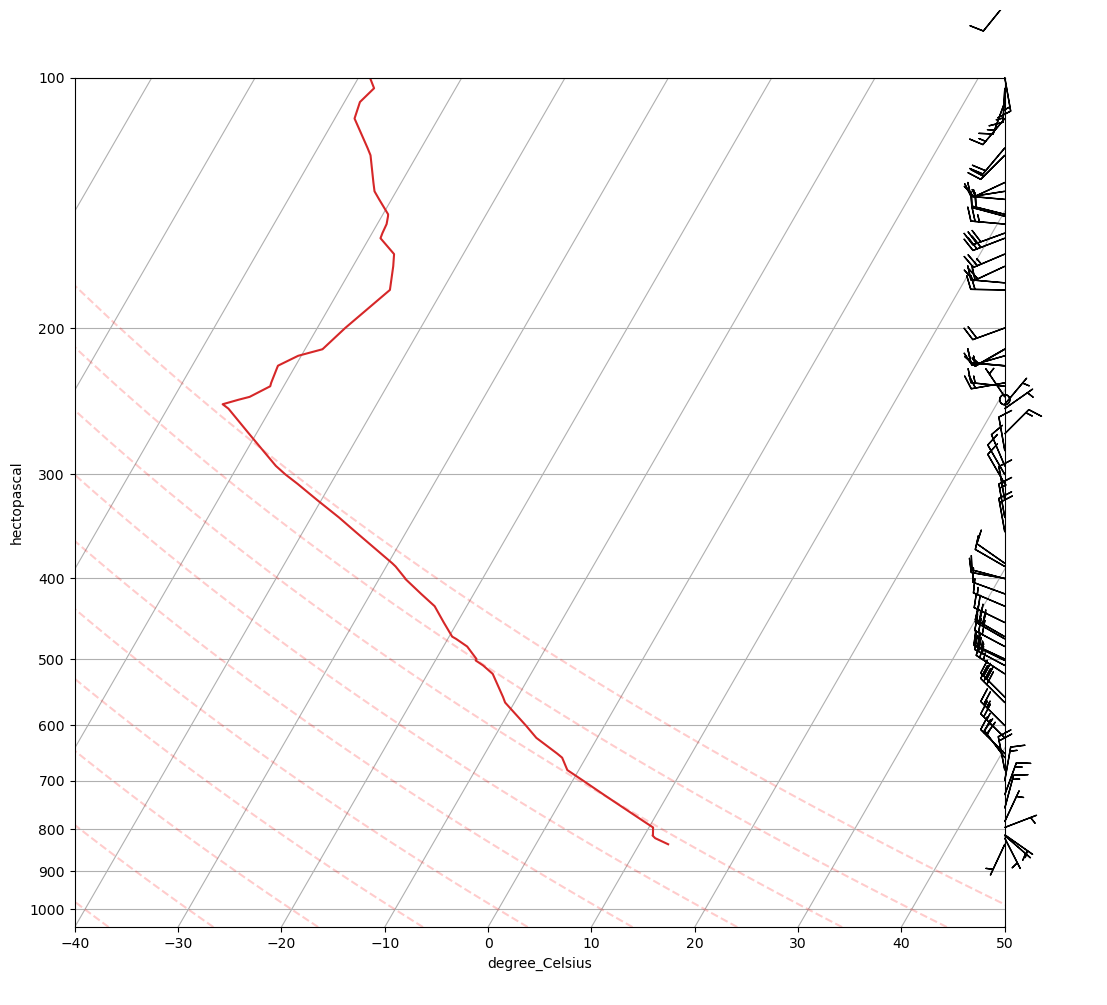

In [13]:
skew = SkewT(plt.figure(figsize=(12, 12)))
skew.plot(sounding_data['pressure'], sounding_data['temperature'], 'tab:red')
skew.plot_barbs(sounding_data['pressure'], sounding_data['u_wind'], sounding_data['v_wind'])

# Make the lines mostly transparent so that they're more subtle on the plot
skew.plot_dry_adiabats(alpha=0.2)

<div class="admonition alert alert-warning">

<p class="admonition-title" style="font-weight:bold">Activity: Visualize using a Skew-T log-p</p>

Let's practice making your own Skew-T:
    
* Download data for a date and site of your choosing. If you're not familiar with any sites, 'DNR' is the site ID for Denver, though you'll need to use older data since Denver has not launched a sounding recently.

* Set up a blank Skew-T

* Plot the profiles of temperature and dewpoint, as well as the wind barbs

* Customize the plot with special lines like dry and moist adiabats and lines of mixing ratio. You can [look at the docs](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT) for more information

* BONUS: The `.ax` property on an instane of `SkewT` gives access to the underlying Matplotlib `Axes` object. Try using `skew.ax.axvline()` to plot lines that highlight the 0 and -20 degree isotherms.
    
</div>

(-50.0, 30.0)

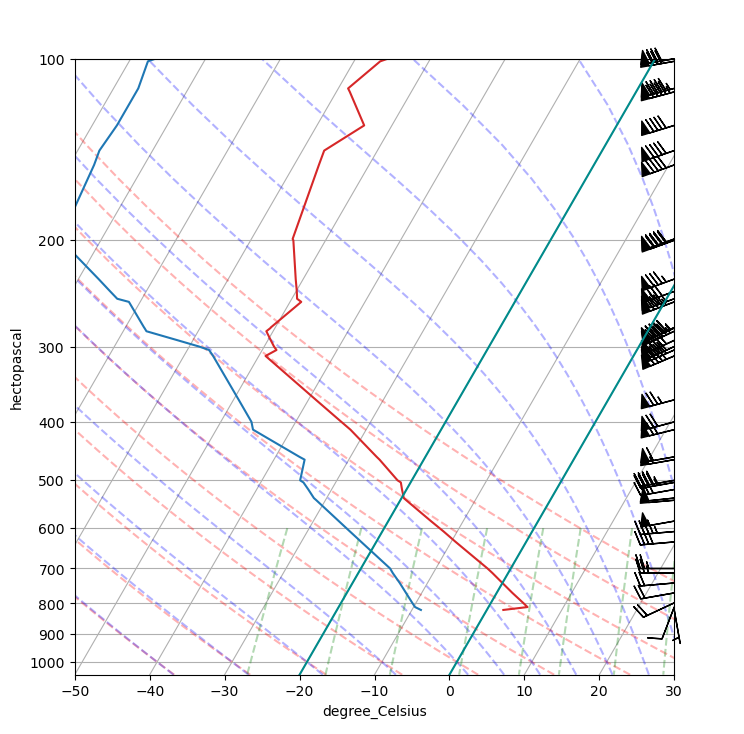

In [14]:
# Get data and process
df = WyomingUpperAir.request_data(datetime(2021, 12, 31, 12), 'DNR')
sounding_data = pandas_dataframe_to_unit_arrays(df)

skew = SkewT(plt.figure(figsize=(8, 8)))
skew.plot(sounding_data['pressure'], sounding_data['temperature'], 'tab:red')
skew.plot(sounding_data['pressure'], sounding_data['dewpoint'], 'tab:blue')
skew.plot_barbs(sounding_data['pressure'], sounding_data['u_wind'], sounding_data['v_wind'])

# Make the lines mostly transparent so that they're more subtle on the plot
skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)
skew.plot_mixing_lines(alpha=0.3)

skew.ax.axvline(0, color='darkcyan')
skew.ax.axvline(-20, color='darkcyan')
skew.ax.set_xlim(-50, 30)